In [75]:
import pandas as pd 
import numpy as np 
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random

# Question 2

In [2]:
# load dataset
boston_dataset = load_boston() 
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names) 
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [25]:
# my linear regression model
class MyLinearRegression(object):
    
    def __init__(self, lr=1e-3, epochs=1000, epsilon=1e-6, alpha=0.5, **kwargs):
        super(MyLinearRegression, self).__init__()

        self.coef = None
        self.lr = lr
        self.epochs = epochs
        self.epsilon = epsilon
        self.alpha = alpha
        self.X_scaler = []
        self.y_scaler = []
        self.log = kwargs['log'] if 'log' in kwargs else None
        
        
    def loss(self, X, y):
        return 0.5 * np.linalg.norm(y - np.matmul(X, self.coef))**2 + self.alpha * np.linalg.norm(self.coef)*2
    
    def grad(self, X, y):
        return -np.matmul(X.T, y-np.matmul(X, self.coef)) + 2 * self.alpha + self.coef
    
    def fit(self, X, y):
        X = np.array([[1] + [each for each in each_X] for each_X in X])
        y = np.array(y).reshape(-1,1)
        for i in range(X.shape[1]):
            self.X_scaler.append(max(X[:,i]))
            X[:,i] /= self.X_scaler[-1]
        for i in range(y.shape[1]):
            self.y_scaler.append(max(y[:,0]))
            y[:,i] /= self.y_scaler[-1]
            
        self.coef = np.random.rand(X.shape[1]).reshape(X.shape[1],1)
        loss = []
        
        for epoch in range(self.epochs):
            loss.append(self.loss(X, y))
            if loss[-1] < self.epsilon:
                break
            grad = self.grad(X, y)
            self.coef = self.coef - self.lr * grad
        
        print('Final loss at epoch {} : {}'.format(epoch, loss[-1]))
        plt.plot([i for i in range(len(loss))], loss)
        plt.show()
    
    def evaluate(self, X, y):
        X = np.array([[1] + [each for each in each_X] for each_X in X])
        for i in range(len(self.X_scaler)):
            X[:,i] /= self.X_scaler[i]
        for i in range(len(self.y_scaler)):
            y[:,i] /= self.y_scaler[i]
        
        loss = self.loss(X, y)
        print('Evaluation loss is {}'.format(loss))
        S_tot = np.sum((y-np.mean(y))**2)
        S_res =  np.linalg.norm(y - np.matmul(X, self.coef))**2
        print(S_tot, S_res)
        R_2 = 1 - S_res/S_tot
        print('Evaluation R2 is {}'.format(R_2))
        plt.plot([i for i in range(len(y))], y - np.matmul(X, self.coef))
        
        
    
    def predict(self, X):
        X = np.array([[1] + [each for each in each_X] for each_X in X]) if X.shape[1]!=self.coef.shape[0] else X
        for i in range(len(self.X_scaler)):
            X[:,i] /= self.X_scaler[i]
        pred = np.matmul(X, self.coef)
        for i in range(len(self.y_scaler)):
            pred[:,i] *= self.y_scaler[i]
        return pred

In [30]:
X = boston.values[:,:-1]
y = boston.values[:, -1].reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Final loss at epoch 1999 : 9.477073951603277


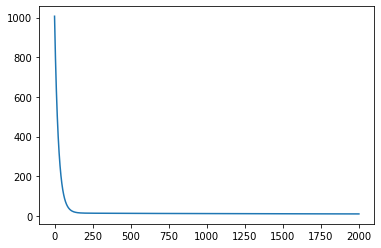

Evaluation loss is 2.5656223400589098
2.9752618431372544 3.1536452667084482
Evaluation R2 is -0.05995553768911255


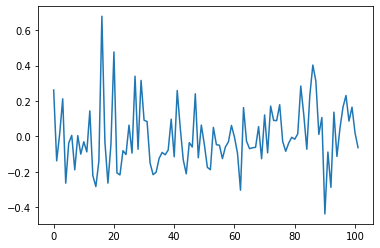

In [31]:
mylr = MyLinearRegression(lr=1e-5, epochs=2000)
mylr.fit(X_train, y_train)
mylr.evaluate(X_test, y_test)

# Question 4

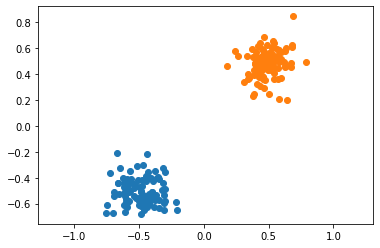

In [67]:
# data preparation and visualization
X = np.append(np.random.randn(200).reshape(100,2) / 9 - 0.5, np.random.randn(200).reshape(100,2) / 9 + 0.5, axis=0)
y = np.array([-1 if i<100 else 1 for i in range(200)])
plt.plot(X[:100,0], X[:100,1], 'o')
plt.plot(X[100:,0], X[100:,1], 'o')
plt.axis('equal')
plt.show()

In [93]:
# my logistic regression model
class MyLogisticRegression(object):
    
    def __init__(self, lr=1e-3, epochs=1000, SGD=False, epsilon=1e-6, alpha=0.5, **kwargs):
        super(MyLogisticRegression, self).__init__()

        self.coef = None
        self.lr = lr
        self.epochs = epochs
        self.SGD = SGD
        self.epsilon = epsilon
        self.alpha = alpha
        self.log = kwargs['log'] if 'log' in kwargs else None
        
        
    def loss(self, X, y):
        res = np.log(1 / (1 + np.exp(-np.matmul(X, self.coef)))) * y
        res += np.log(np.exp(-np.matmul(X, self.coef)) / (1 + np.exp(-np.matmul(X, self.coef)))) * (1-y)
        return -np.sum(res)
    
    def grad(self, X, y):
        assert X.shape[0] == y.shape[0]
        if self.SGD:
            n = X.shape[0]//3
            idxs = [i for i in range(X.shape[0])]
            random.shuffle(idxs)
            sample_X, sample_y = [], []
            for i in range(n):
                sample_X.append(X[idxs[i]])
                sample_y.append(y[idxs[i]])
            sample_X, sample_y = np.array(sample_X), np.array(sample_y).reshape(-1,1)
            return - np.matmul(sample_X.T, sample_y - 1 / (1  + np.exp(-np.matmul(sample_X, self.coef))))
        else:
            return - np.matmul(X.T, y - 1 / (1  + np.exp(-np.matmul(X, self.coef))))
    
    def fit(self, X, y):
        X = np.array([[1] + [each for each in each_X] for each_X in X])
        y = np.array([1 if each==1 else 0 for each in y]).reshape(-1,1)
            
        self.coef = np.random.rand(X.shape[1]).reshape(X.shape[1],1)
        loss = []
        
        for epoch in range(self.epochs):
            loss.append(self.loss(X, y))
            if loss[-1] < self.epsilon:
                break
            grad = self.grad(X, y)
            self.coef = self.coef - self.lr * grad
        
        print('Final loss at epoch {} : {}'.format(epoch, loss[-1]))
        plt.plot([i for i in range(len(loss))], loss)
        plt.show()
    
    def evaluate(self, X, y):
        X = np.array([[1] + [each for each in each_X] for each_X in X])
        
        loss = self.loss(X, y)
        print('Evaluation loss is {}'.format(loss))
        S_tot = np.sum((y-np.mean(y))**2)
        S_res =  np.linalg.norm(y - np.matmul(X, self.coef))**2
        print(S_tot, S_res)
        R_2 = 1 - S_res/S_tot
        print('Evaluation R2 is {}'.format(R_2))
        plt.plot([i for i in range(len(y))], y - np.matmul(X, self.coef))
        
        
    
    def predict(self, X):
        X = np.array([[1] + [each for each in each_X] for each_X in X]) if X.shape[1]!=self.coef.shape[0] else X
        pred = np.matmul(X, self.coef)
        return pred

Final loss at epoch 1999 : 1.3076330230221793


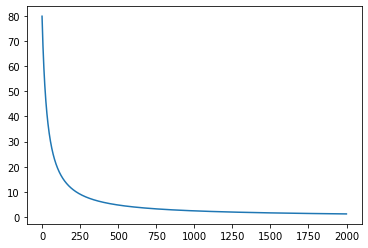

Final loss at epoch 1999 : 3.8121624600601773


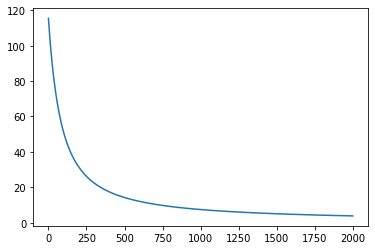

In [94]:
mylr_GD = MyLogisticRegression(epochs=2000)
mylr_GD.fit(X, y)
mylr_SGD = MyLogisticRegression(SGD=True, epochs=2000)
mylr_SGD.fit(X,y)